**运行环境：**
Python3.6.5  

**安装包：**
pandas、numpy、matplotlib、seaborn、bokeh等

**数据集说明：**
- 来源：家中用电情况
- 目的：提升数据处理熟练度
## 两种方式
* 选择合理的数据读取方式，可让数据清洗变得更方便
    * pd.read_clipboard()
        * 需要重新设置各类的数据类型
        * 尤其是时间序列
        
    * pd.read_excel()
        * 可辨认出Excel表中的时间列，并读取为时间序列格式
        * 更方便

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']# 设置默认字体，解决中文显示问题
plt.style.use('ggplot')# 更改设计风格

# 读取方式一，read_clipboard
    * 需要重新设置日期类型

In [3]:
df = pd.read_clipboard()

d:\Anaconda3\lib\site-packages\pandas\io\clipboards.py:63: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_table(StringIO(text), sep=sep, **kwargs)


In [4]:
df

,查表时间,实际天数,电消耗量,单价,金额,日均费用,日均电量
0,2018年1月,30.0,121,0.56,67.76,2.26,4.03
1,2018年2月,27.0,142,0.56,79.52,2.95,5.26
2,2018年3月,30.0,99,0.56,55.44,1.85,3.30
3,2018年4月,29.0,137,0.56,76.72,2.65,4.72
4,2018年5月,30.0,114,0.56,63.84,2.13,3.80
5,2018年6月,29.0,118,0.56,66.08,2.28,4.07
6,2018年7月,30.0,124,0.56,69.44,2.31,4.13
7,2018年8月,30.0,139,0.56,77.84,2.59,4.63
8,2018年9月,29.0,142,0.56,79.52,2.74,4.90
9,2018年10月,30.0,98,0.56,54.88,1.83,3.27


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
查表时间    11 non-null object
实际天数    11 non-null float64
电消耗量    11 non-null int64
单价      11 non-null float64
金额      11 non-null float64
日均费用    11 non-null float64
日均电量    11 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 612.0+ bytes


* 添加辅助列【date】，统一为每月一号为数据记录日

In [6]:
df['date'] = [str(i)+'1号' for i in df['查表时间']]

In [7]:
df = df.drop(['实际天数','金额','日均费用','日均电量'],axis = 1)#删除列

In [8]:
df

,查表时间,电消耗量,单价,date
0,2018年1月,121,0.56,2018年1月1号
1,2018年2月,142,0.56,2018年2月1号
2,2018年3月,99,0.56,2018年3月1号
3,2018年4月,137,0.56,2018年4月1号
4,2018年5月,114,0.56,2018年5月1号
5,2018年6月,118,0.56,2018年6月1号
6,2018年7月,124,0.56,2018年7月1号
7,2018年8月,139,0.56,2018年8月1号
8,2018年9月,142,0.56,2018年9月1号
9,2018年10月,98,0.56,2018年10月1号


## 去除列中的中文
* 通过正则表达式，只保留字符串中的数字

In [11]:
def cleantxt(raw):
    fil = re.compile('[^0-9]', re.UNICODE)
    return fil.sub(' ', raw)

In [12]:
df.date = df['date'].apply(cleantxt)

In [13]:
df

,查表时间,电消耗量,单价,date
0,2018年1月,121,0.56,2018 1 1
1,2018年2月,142,0.56,2018 2 1
2,2018年3月,99,0.56,2018 3 1
3,2018年4月,137,0.56,2018 4 1
4,2018年5月,114,0.56,2018 5 1
5,2018年6月,118,0.56,2018 6 1
6,2018年7月,124,0.56,2018 7 1
7,2018年8月,139,0.56,2018 8 1
8,2018年9月,142,0.56,2018 9 1
9,2018年10月,98,0.56,2018 10 1


## 整理date列
1. 去除两边的空格
2. 以空格拆分为年月日
3. 用【-】连接年月日
4. 转换为Datetime类型

In [14]:
df.date[0].strip().split(' ')

['2018', '1', '1']

In [15]:
def foo(line):
    item = line.strip().split(' ')
    return pd.Series([item[0]+'-'+item[1]+'-'+item[2]])

In [16]:
df.date = df['date'].apply(foo)

In [17]:
df

,查表时间,电消耗量,单价,date
0,2018年1月,121,0.56,2018-1-1
1,2018年2月,142,0.56,2018-2-1
2,2018年3月,99,0.56,2018-3-1
3,2018年4月,137,0.56,2018-4-1
4,2018年5月,114,0.56,2018-5-1
5,2018年6月,118,0.56,2018-6-1
6,2018年7月,124,0.56,2018-7-1
7,2018年8月,139,0.56,2018-8-1
8,2018年9月,142,0.56,2018-9-1
9,2018年10月,98,0.56,2018-10-1


In [18]:
df.index = pd.DatetimeIndex(df.date)

In [19]:
df

,查表时间,电消耗量,单价,date
date,,,,
2018-01-01,2018年1月,121,0.56,2018-1-1
2018-02-01,2018年2月,142,0.56,2018-2-1
2018-03-01,2018年3月,99,0.56,2018-3-1
2018-04-01,2018年4月,137,0.56,2018-4-1
2018-05-01,2018年5月,114,0.56,2018-5-1
2018-06-01,2018年6月,118,0.56,2018-6-1
2018-07-01,2018年7月,124,0.56,2018-7-1
2018-08-01,2018年8月,139,0.56,2018-8-1
2018-09-01,2018年9月,142,0.56,2018-9-1


In [20]:
df_new = df.loc[:,['电消耗量','单价']]

In [21]:
df_new.rename(columns={'电消耗量':'每月用电量'},inplace=True)

In [22]:
df_new

,每月用电量,单价
date,,
2018-01-01,121,0.56
2018-02-01,142,0.56
2018-03-01,99,0.56
2018-04-01,137,0.56
2018-05-01,114,0.56
2018-06-01,118,0.56
2018-07-01,124,0.56
2018-08-01,139,0.56
2018-09-01,142,0.56


In [23]:
df_new['每月用电总价'] = df_new['每月用电量']*df_new['单价']

In [24]:
df_new

,每月用电量,单价,每月用电总价
date,,,
2018-01-01,121,0.56,67.76
2018-02-01,142,0.56,79.52
2018-03-01,99,0.56,55.44
2018-04-01,137,0.56,76.72
2018-05-01,114,0.56,63.84
2018-06-01,118,0.56,66.08
2018-07-01,124,0.56,69.44
2018-08-01,139,0.56,77.84
2018-09-01,142,0.56,79.52


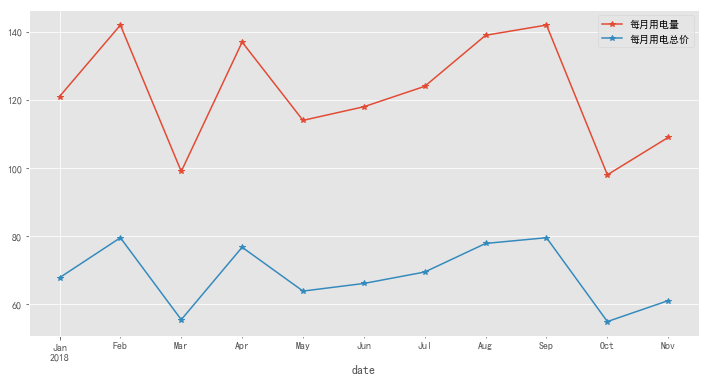

In [25]:
df_new[['每月用电量','每月用电总价']].plot(style='-*',figsize=(12,6))

# 读取方式二，pd.read_excel()

In [35]:
df1 = pd.read_excel('f:/test/data/个人用电情况报表.xlsx',header=1,index_col='查表时间')

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2018-01-01 to 2018-11-01
Data columns (total 8 columns):
实际天数    11 non-null int64
电消耗量    11 non-null int64
单价      11 non-null float64
金额      11 non-null float64
日均费用    11 non-null float64
日均电量    11 non-null float64
最大最小    3 non-null float64
标记点     3 non-null float64
dtypes: float64(6), int64(2)
memory usage: 792.0 bytes


* 由上可知，index列，直接读取为Excel日期格式——方便

In [37]:
df1

,实际天数,电消耗量,单价,金额,日均费用,日均电量,最大最小,标记点
查表时间,,,,,,,,
2018-01-01,30,121,0.56,67.76,2.258667,4.033333,NaN,NaN
2018-02-01,27,142,0.56,79.52,2.945185,5.259259,79.52,79.52
2018-03-01,30,99,0.56,55.44,1.848000,3.300000,NaN,NaN
2018-04-01,29,137,0.56,76.72,2.645517,4.724138,NaN,NaN
2018-05-01,30,114,0.56,63.84,2.128000,3.800000,NaN,NaN
2018-06-01,29,118,0.56,66.08,2.278621,4.068966,NaN,NaN
2018-07-01,30,124,0.56,69.44,2.314667,4.133333,NaN,NaN
2018-08-01,30,139,0.56,77.84,2.594667,4.633333,NaN,NaN
2018-09-01,29,142,0.56,79.52,2.742069,4.896552,79.52,79.52


# 可视化

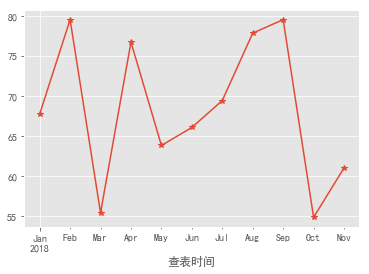

In [64]:
df1['金额'].plot(style='*-')#折线图

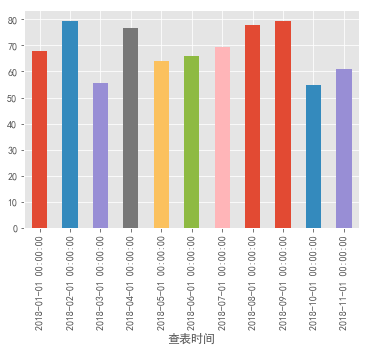

In [44]:
df1['金额'].plot.bar()#柱形图

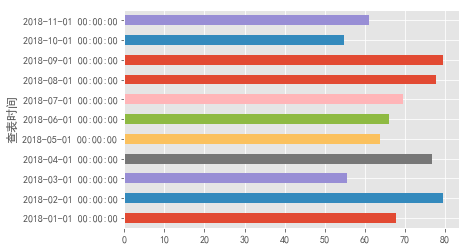

In [55]:
df1['金额'].plot.barh()#条形图

* 下方图形——画着玩

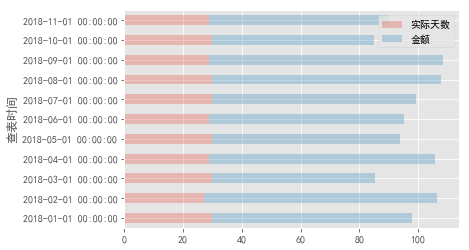

In [56]:
df1.loc[:,['实际天数','金额']].plot.barh(stacked=True,alpha=0.3)# 堆积条形图

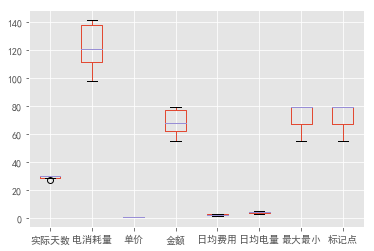

In [58]:
df1.boxplot()